# Notebook E-tivity 3 CE4021 Task 1

Student name: Yvonne Ryan

Student ID: 21208298

<hr style=\"border:2px solid gray\"> </hr>

## Imports

In [4]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

 If you believe required imports are missing, please contact your moderator.

<hr style=\"border:2px solid gray\"> </hr>

## Task 1

You may add as many cells as you require to complete the task.

### Problem Description:

Option Dice:  Rolling two 6-sided fair dice with the aim of determining the probability that the sum of the two dice is less than 3 or more than 10.

- Briefly explain the type of random variable and probability distribution you will use. The choice of a continuous or a discrete random variable, and the probability distribution (normal, uniform, binomial, ..) should be informed by the type of experiment.
- Write Python code to simulate the experiment. The code should run the experiment a sufficient number of times such that you can experimentally approximate the following:

 - The expected value of your random variable.

 - The standard deviation of your random variable.

 - Plot the distribution found in your simulated experiment with an appropriate number of 'bins'

N.B.:

Structure your notebook as follows:
1. Markdown cell with problem description
2. Markdown cells with expected value and standard deviation of your random variable
3. Cell(s) with experiment
4. Cell(s) with outputs and graphs
5. Commentary comparing calculated values to experimentally obtained values.

You may only use the following modules:
1. Random
2. Numpy
3. A visualisation module such as Matplotlib
4. Math

You are not required to perform exception handling.
You are not required to provide tests for your code.


### Introduction:

Probability Mass Function - for discrete random variables

### Expected Value & Standard Deviation

##### Probability of Each Possible Outcome

The sample space of a standard, 6-sided die is 6: there are 6 possible outcomes. Adding another identical die has the effect of squaring the number of possible outcomes, and the sample space of the pair of dice $s_2$ becomes $6^2 = 36$. If the order is important - e.g. which die rolled each value - each outcome $x$ is equally probable, with a probability $P(x)_{ordered} = \frac{1}{s_2} = \frac{1}{36}$. 

Table 1 illustrates all possible combinations from rolling a pair of 6-sided dice - as expected, there are 36 possibilities. This can be generalised in the case of $n$ 6-sided dice to $s_n = 6^n$, with an associated probability of $\frac{1}{s_n} = \frac{1}{6^n}$ for each ordered pair of sides. 

_Table 1: Possible ordered outcomes from rolling pair of dice_

| |1|2|3|4|5|6|
|-|-|-|-|-|-|-|
|*1*|1,1|1,2|1,3|1,4|1,5|1,6|
|*2*|2,1|2,2|2,3|2,4|2,5|2,6|
|*3*|3,1|3,2|3,3|3,4|3,5|3,6|
|*4*|4,1|4,2|4,3|4,4|4,5|4,6|
|*5*|5,1|5,2|5,3|5,4|5,5|5,6|
|*6*|6,1|6,2|6,3|6,4|6,5|6,6|

However, in this experiment, we are concerned with the sum of the sides when the pair of dice is rolled, and so the ordering is unimportant. For our purposes, rolling a 2 on the first die and a 1 on the second is equivalent to rolling a 1 on the first and 2 on the second, as both combinations sum to the same outcome of 3. And so the probability of each outcome is no longer equal, as multiple combinations of dice rolls may give the same sum. 

Table 2 shows the result of summing the sides of a pair of dice for all combinations shown in Table 1. From visual inspection of the off-diagonal elements, we see that 2 and 12 are the least probable: only a single combination yields each of these outcomes. By contrast, there are 6 ways to roll a 7, making this the most likely outcome.

_Table 2: Possible outcomes from summing sides of pair of dice_

| |1|2|3|4|5|6|
|-|-|-|-|-|-|-|
|*1*|2|3|4|5|6|7|
|*2*|3|4|5|6|7|8|
|*3*|4|5|6|7|8|9|
|*4*|5|6|7|8|9|10|
|*5*|6|7|8|9|10|11|
|*6*|7|8|9|10|11|12|

With this in mind, let us calculate the probability of each of these outcomes. We divide the number of ways to obtain a given result by the number of possible combinations of sides, a.k.a. the sample space $s_2 = 36$. The probability of each outcome $x$ - i.e. each sum from Table 2 - is given in Table 3 below.

_Table 3: Probability of each outcome $x$ from summing sides of pair of dice_

|$x$|$2$|$3$|$4$|$5$|$6$|$7$|$8$|$9$|$10$|$11$|$12$|
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
|$P(x)$|$\frac{1}{36}$|$\frac{2}{36}$|$\frac{3}{36}$|$\frac{4}{36}$|$\frac{5}{36}$|$\frac{6}{36}$|$\frac{5}{36}$|$\frac{4}{36}$|$\frac{3}{36}$|$\frac{2}{36}$|$\frac{1}{36}$|

##### Expected Value

The expected value $\left<x\right>$ is the arithmetic mean of all values $x$ weighted by their probability $P(x)$. 

#### Simulation

First, we define functions that will perform the dice-rolling simulation. Each trial consists of generating a set of random numbers ranging from 1 to 6 (inclusive), summing these and appending the sum to a list of results. The function performs an arbritrary number of trials *n_trials*, for an arbritrary number of dice *n_dice*. Both of these parameters are set when the function is called.

In [156]:
def dice_trials(n_dice, n_trials):
    '''
    Simulates rolling a number (n_dice) of fair 6-sided 
    dice a number (n_trials) of times, and returns a list
    of the results from all trials.
    '''
    
    def dice_sum(n_dice):
        '''
        Simulates rolling a number (n_dice) of 6-sided dice
        and sums the result.
        Returns an integer.
        '''
        # Initialise running total
        total = 0
        
        # Iterate through all the dice
        for n in range(0, n_dice):
            
            # Roll the next die & add the result to total
            total += random.randint(1,6)
            
        return total
    
    # Perform all trials & return the list of results
    return [dice_sum(n_dice) for n in range(0, n_trials)]


Set parameters & run the simulation.

As defined in the problem statement, the number of trials will be set to 2 so as to simulate a pair of dice.

In [162]:
# Set parameters for the simulation
n_dice = 2
n_trials = 1000000

# Run the simulation
result = dice_trials(n_dice, n_trials)

# Count the frequency of each outcome
outcome, freq = np.unique(np.array(result), return_counts = True)

# try zipping outcome & freq to find prob. of <3, >10

Plot the results of the simulation:

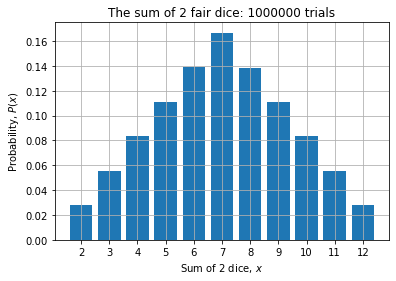

In [167]:
# Initialise plot
plt.figure()

# Plot the results
plt.bar(outcome, freq/n_trials, tick_label=outcome)

# Add title, gridlines & axis labels
plt.title("The sum of {} fair dice: {} trials".format(n_dice, n_trials))
plt.grid(b=True, which='major', axis='both')
plt.xlabel("Sum of {} dice, $x$".format(n_dice))
plt.ylabel("Probability, $P(x)$")

# Display the plot
plt.show()

<hr style=\"border:2px solid gray\"> </hr>

## Reflection

Write you reflection in below cell.